<a href="https://colab.research.google.com/github/Amaayu/Amaayu/blob/main/insurance_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [79]:
df = pd.read_csv('insurance.csv')

                                                                EDA Steps

In [80]:
# step 1 EDA
df.shape

(1338, 7)

In [81]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [83]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [84]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [85]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

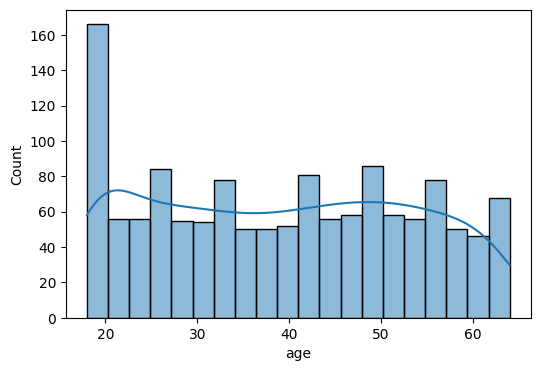

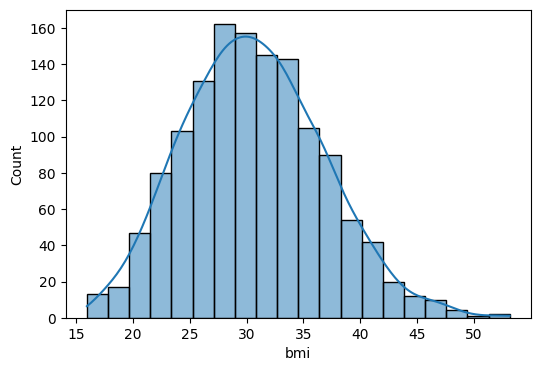

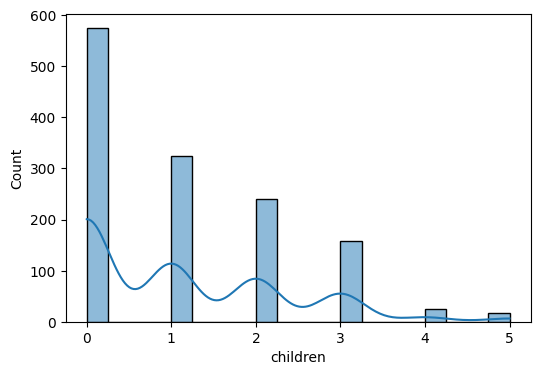

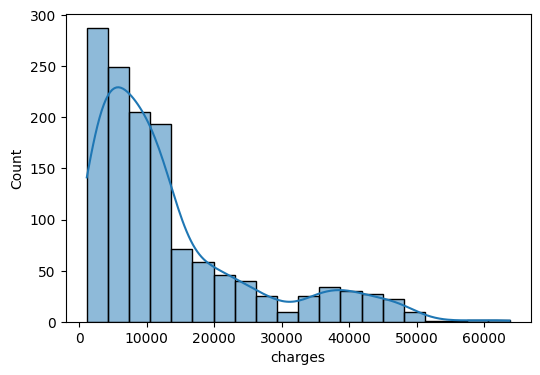

In [86]:
numeric_colums = ['age', 'bmi', 'children', 'charges']
for col in numeric_colums:
  plt.figure(figsize=(6,4))
  sns.histplot(df[col],kde = True , bins= 20)

<Axes: xlabel='children', ylabel='count'>

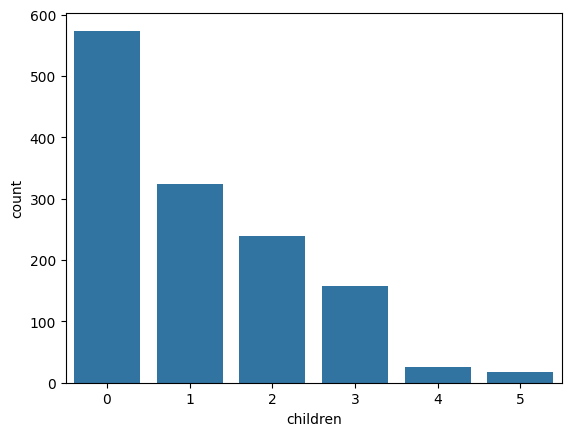

In [87]:
sns.countplot(x = df['children'])

<Axes: xlabel='sex', ylabel='count'>

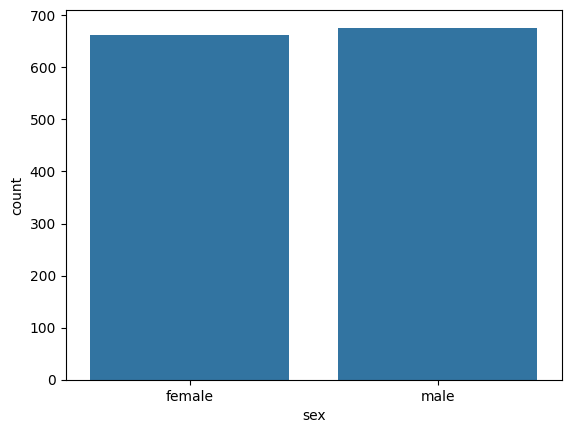

In [88]:
sns.countplot(x = df['sex'])

<Axes: xlabel='smoker', ylabel='count'>

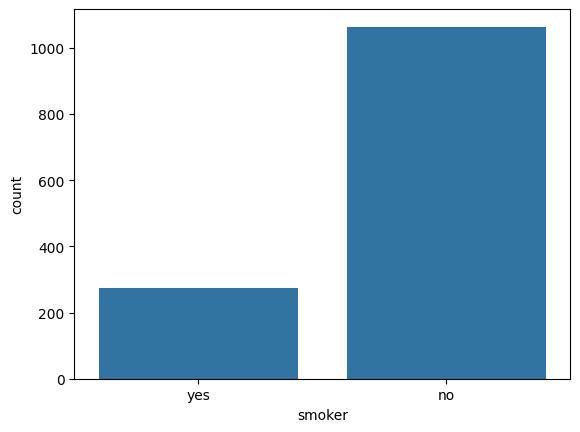

In [89]:
sns.countplot(x = df['smoker'])

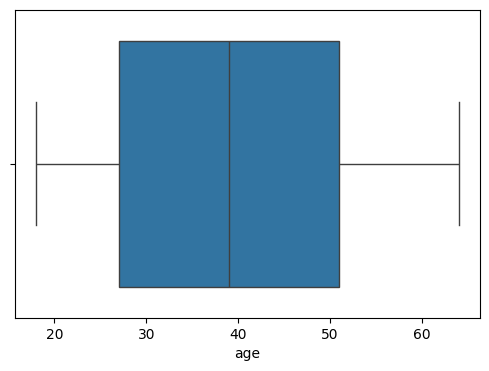

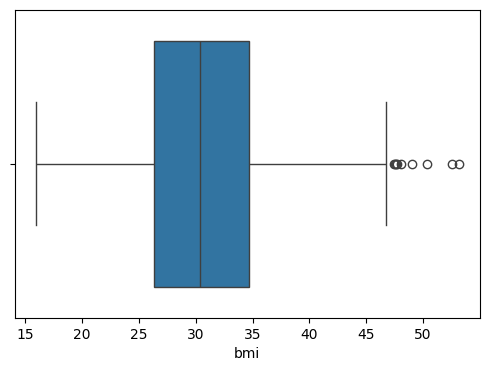

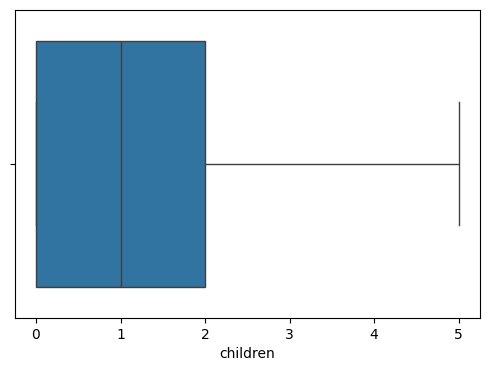

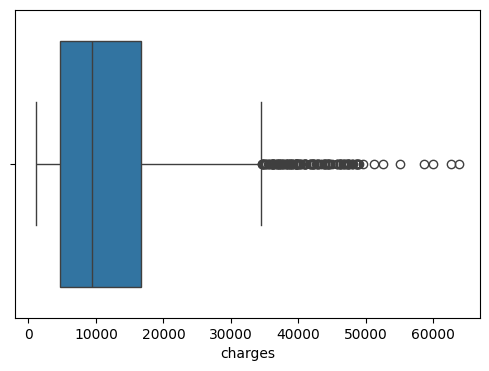

In [90]:
for col in numeric_colums:
  plt.figure(figsize=(6,4))
  sns.boxplot(x = df[col])

<Axes: >

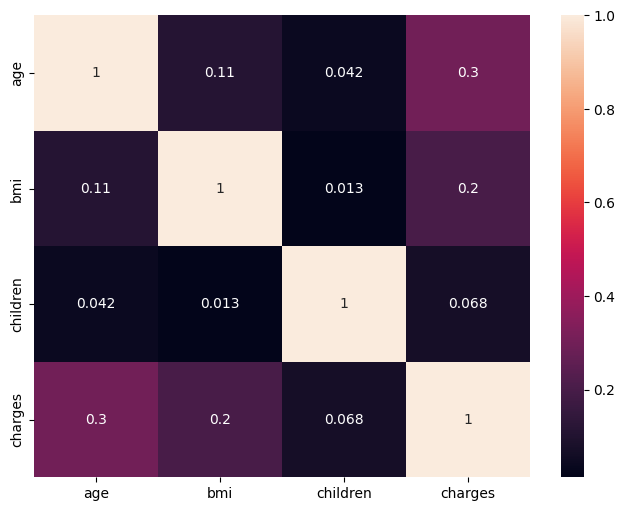

In [91]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True)

      Step 2 Data Cleaning and Preprocessing

In [92]:
df_clean = df.copy()

In [93]:
df_clean.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [94]:
df_clean.drop_duplicates(inplace= True)

In [95]:
df_clean.shape

(1337, 7)

In [96]:
df_clean.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [97]:
df_clean.dtypes

,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64


In [98]:
df_clean['sex'].value_counts()

,count
sex,
male,675
female,662


In [99]:
df_clean['sex'] = df_clean['sex'].map({"male": 0 , "female" : 1})

In [100]:
df_clean.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520


In [101]:
df_clean['smoker'].value_counts()

,count
smoker,
no,1063
yes,274


In [102]:
df_clean['smoker'] = df_clean['smoker'].map({"yes":1 , "no":0})
df_clean.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [103]:
df_clean.rename(columns = {'sex':'is_female','smoker': 'is_smoker'}, inplace= True)
df_clean.head()

,age,is_female,bmi,children,is_smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [104]:
df_clean['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,324
northeast,324


In [105]:
df_clean = pd.get_dummies(df_clean, columns=['region'], drop_first=True)
df_clean.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,False,False,True
1,18,0,33.770,1,0,1725.55230,False,True,False
2,28,0,33.000,3,0,4449.46200,False,True,False
3,33,0,22.705,0,0,21984.47061,True,False,False
4,32,0,28.880,0,0,3866.85520,True,False,False


In [106]:
df_clean = df_clean.astype('int')
df_clean.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27,0,1,16884,0,0,1
1,18,0,33,1,0,1725,0,1,0
2,28,0,33,3,0,4449,0,1,0
3,33,0,22,0,0,21984,1,0,0
4,32,0,28,0,0,3866,1,0,0


Feature Enginnering and Extraction

<Axes: xlabel='bmi', ylabel='Count'>

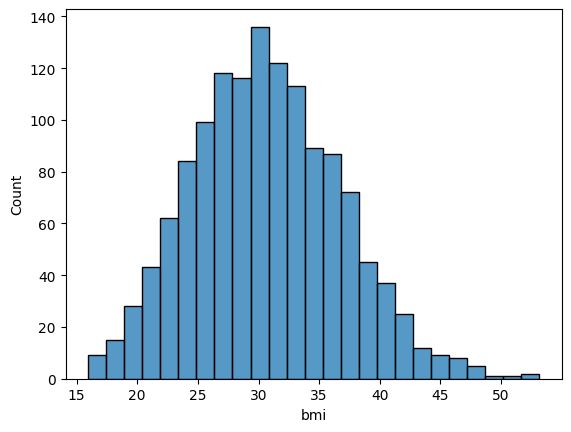

In [107]:
sns.histplot(df['bmi'])

In [108]:
df_clean['bmi_category'] = df_clean['bmi_category'] = pd.cut(df_clean['bmi'],
        bins=[0, 18.5, 24.9, 29.9, float('inf')],
        labels=['Underweight', 'Normal', 'Overweight', 'Obese'])
df_clean

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category
0,19,1,27,0,1,16884,0,0,1,Overweight
1,18,0,33,1,0,1725,0,1,0,Obese
2,28,0,33,3,0,4449,0,1,0,Obese
3,33,0,22,0,0,21984,1,0,0,Normal
4,32,0,28,0,0,3866,1,0,0,Overweight
...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30,3,0,10600,1,0,0,Obese
1334,18,1,31,0,0,2205,0,0,0,Obese
1335,18,1,36,0,0,1629,0,1,0,Obese
1336,21,1,25,0,0,2007,0,0,1,Overweight


In [109]:
df_clean= pd.get_dummies(df_clean, columns=['bmi_category'], drop_first=True)
df_clean = df_clean.astype('int')

In [110]:
df_clean.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese
0,19,1,27,0,1,16884,0,0,1,0,1,0
1,18,0,33,1,0,1725,0,1,0,0,0,1
2,28,0,33,3,0,4449,0,1,0,0,0,1
3,33,0,22,0,0,21984,1,0,0,1,0,0
4,32,0,28,0,0,3866,1,0,0,0,1,0


In [111]:
df_clean.columns

Index(['age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges',
       'region_northwest', 'region_southeast', 'region_southwest',
       'bmi_category_Normal', 'bmi_category_Overweight', 'bmi_category_Obese'],
      dtype='object')

In [112]:
from sklearn.preprocessing import StandardScaler
cols = ['age', 'bmi', 'children']
scaler = StandardScaler()
df_clean[cols] = scaler.fit_transform(df_clean[cols])

In [113]:
df_clean.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese
0,-1.440418,1,-0.517949,-0.909234,1,16884,0,0,1,0,1,0
1,-1.511647,0,0.462463,-0.079442,0,1725,0,1,0,0,0,1
2,-0.799350,0,0.462463,1.580143,0,4449,0,1,0,0,0,1
3,-0.443201,0,-1.334960,-0.909234,0,21984,1,0,0,1,0,0
4,-0.514431,0,-0.354547,-0.909234,0,3866,1,0,0,0,1,0


Feature Extracting

In [114]:
from scipy.stats import pearsonr
selected_Feature = [
    'age', 'bmi', 'children', 'is_female', 'is_smoker', 'region_northwest',
    'region_southeast', 'region_southwest' , 'bmi_category_Normal',
    'bmi_category_Overweight', 'bmi_category_Obese'
]

correlate = {
    feature: pearsonr(df_clean[feature], df_clean['charges'])[0]
    for feature in selected_Feature
}

correlate_df = pd.DataFrame(list(correlate.items()), columns=['Feature', 'Correlation'])
correlate_df = correlate_df.sort_values(by='Correlation', ascending=False)
correlate_df

,Feature,Correlation
4,is_smoker,0.787234
0,age,0.298309
10,bmi_category_Obese,0.200348
1,bmi,0.196236
6,region_southeast,0.073577
2,children,0.067390
5,region_northwest,-0.038695
7,region_southwest,-0.043637
3,is_female,-0.058046
8,bmi_category_Normal,-0.104042


In [115]:
cat_features = ['is_female', 'is_smoker', 'region_northwest', 'region_southeast', 'region_southwest']

In [118]:
final_df = df_clean[['age','is_female','bmi','children','is_smoker','charges','region_southeast','bmi_category_Obese']]
display(final_df)

,age,is_female,bmi,children,is_smoker,charges,region_southeast,bmi_category_Obese
0,-1.440418,1,-0.517949,-0.909234,1,16884,0,0
1,-1.511647,0,0.462463,-0.079442,0,1725,1,1
2,-0.799350,0,0.462463,1.580143,0,4449,1,1
3,-0.443201,0,-1.334960,-0.909234,0,21984,0,0
4,-0.514431,0,-0.354547,-0.909234,0,3866,0,0
...,...,...,...,...,...,...,...,...
1333,0.767704,0,-0.027743,1.580143,0,10600,0,1
1334,-1.511647,1,0.135659,-0.909234,0,2205,0,1
1335,-1.511647,1,0.952670,-0.909234,0,1629,1,1
1336,-1.297958,1,-0.844753,-0.909234,0,2007,0,0
